IMPORTING NECESSARY LIBRARIES

In [486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualisation

In [487]:
df= pd.read_csv('ElectricCarData_Clean.csv')  #reading data

An electric vehicle (EV) is a vehicle that uses one or more electric motors for propulsion. It can be powered by a collector system, with electricity from xtravehicular sources, or it can be powered autonomously by a battery sometimes charged by solar panels, or by converting fuel to electricity using fuel cells or a generator. EVs include, but are not limited to, road and rail vehicles, surface and underwater vessels, electric aircraft and electric spacecraft.

In the 21st century, EVs have seen a resurgence due to technological developments, and an increased focus on renewable energy and the potential reduction of transportation's impact on climate change and other environmental issues. Project Drawdown describes electric vehicles as one of the 100 best contemporary solutions for addressing climate change.

Government incentives to increase adoption were first introduced in the late 2000s, including in the United States and the European Union, leading to a growing market for the vehicles in the 2010s. Increasing public interest and awareness and structural incentives, such as those being built into the green recovery from the COVID-19 pandemic, is expected to greatly increase the electric vehicle market. The International Energy Agency said in 2021 that governments should do more to meet climate goals, including policies for heavy electric vehicles. Electric vehicle sales may increase from 2% of global share in 2016 to 30% by 2030. Much of this growth is expected in markets like North America, Europe and China; a 2020 literature review suggested that growth in use of electric 4-wheeled vehicles appears economically unlikely in developing economies, but that electric 2-wheeler growth is likely. There are more 2 and 3 wheel EVs than any other type.

In [488]:
df.head()           #first 5 samples of data

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [489]:
df.tail()               #last 5 samples of data

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
102,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480,Yes,AWD,Type 2 CCS,SUV,E,5,62000


In [490]:
df.columns            #identifying column names

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [491]:
df.info()       # information of dataset like range index ,columndata type, null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [492]:
df.sample(10)             #random 10 sample

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
72,Porsche,Taycan Cross Turismo,3.5,250,385,217,770,Yes,AWD,Type 2 CCS,Station,F,4,150000
60,Renault,Zoe ZE40 R110,11.4,135,255,161,230,Yes,FWD,Type 2 CCS,Hatchback,B,5,29234
11,Nissan,Leaf,7.9,144,220,164,230,Yes,FWD,Type 2 CHAdeMO,Hatchback,C,5,29234
84,Mercedes,EQV 300 Long,10.0,140,330,273,290,Yes,FWD,Type 2 CCS,SPV,N,7,70631
45,Kia,e-Soul 64 kWh,7.9,167,365,175,340,Yes,FWD,Type 2 CCS,SUV,B,5,36837
65,Porsche,Taycan 4S Plus,4.0,250,425,197,890,Yes,AWD,Type 2 CCS,Sedan,F,4,109302
35,Nissan,Leaf e+,7.3,157,325,172,390,Yes,FWD,Type 2 CHAdeMO,Hatchback,C,5,37237
94,Fiat,500e Convertible,9.0,150,250,168,330,Yes,FWD,Type 2 CCS,Cabrio,B,4,37900
10,Mercedes,EQC 400 4MATIC,5.1,180,370,216,440,Yes,AWD,Type 2 CCS,SUV,D,5,69484
34,Mazda,MX-30,9.0,150,180,178,240,Yes,FWD,Type 2 CCS,SUV,C,5,32646


In [493]:
df.describe()         # info of mean,mode,median,50%,75%,max and min rating

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [494]:
df.shape        #total rows and columns

(103, 14)

In [495]:
Q1=df.quantile(0.25)        # Detect and handle outliers using IQR method
Q1

<ipython-input-495-338b587e8b19>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(0.25)


AccelSec               5.1
TopSpeed_KmH         150.0
Range_Km             250.0
Efficiency_WhKm      168.0
Seats                  5.0
PriceEuro          34429.5
Name: 0.25, dtype: float64

In [496]:
Q3=df.quantile(0.75)
Q3

<ipython-input-496-f9d65d450a78>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df.quantile(0.75)


AccelSec               9.0
TopSpeed_KmH         200.0
Range_Km             400.0
Efficiency_WhKm      203.0
Seats                  5.0
PriceEuro          65000.0
Name: 0.75, dtype: float64

In [497]:
IQR = Q3 - Q1
IQR

AccelSec               3.9
TopSpeed_KmH          50.0
Range_Km             150.0
Efficiency_WhKm       35.0
Seats                  0.0
PriceEuro          30570.5
dtype: float64

# EDA

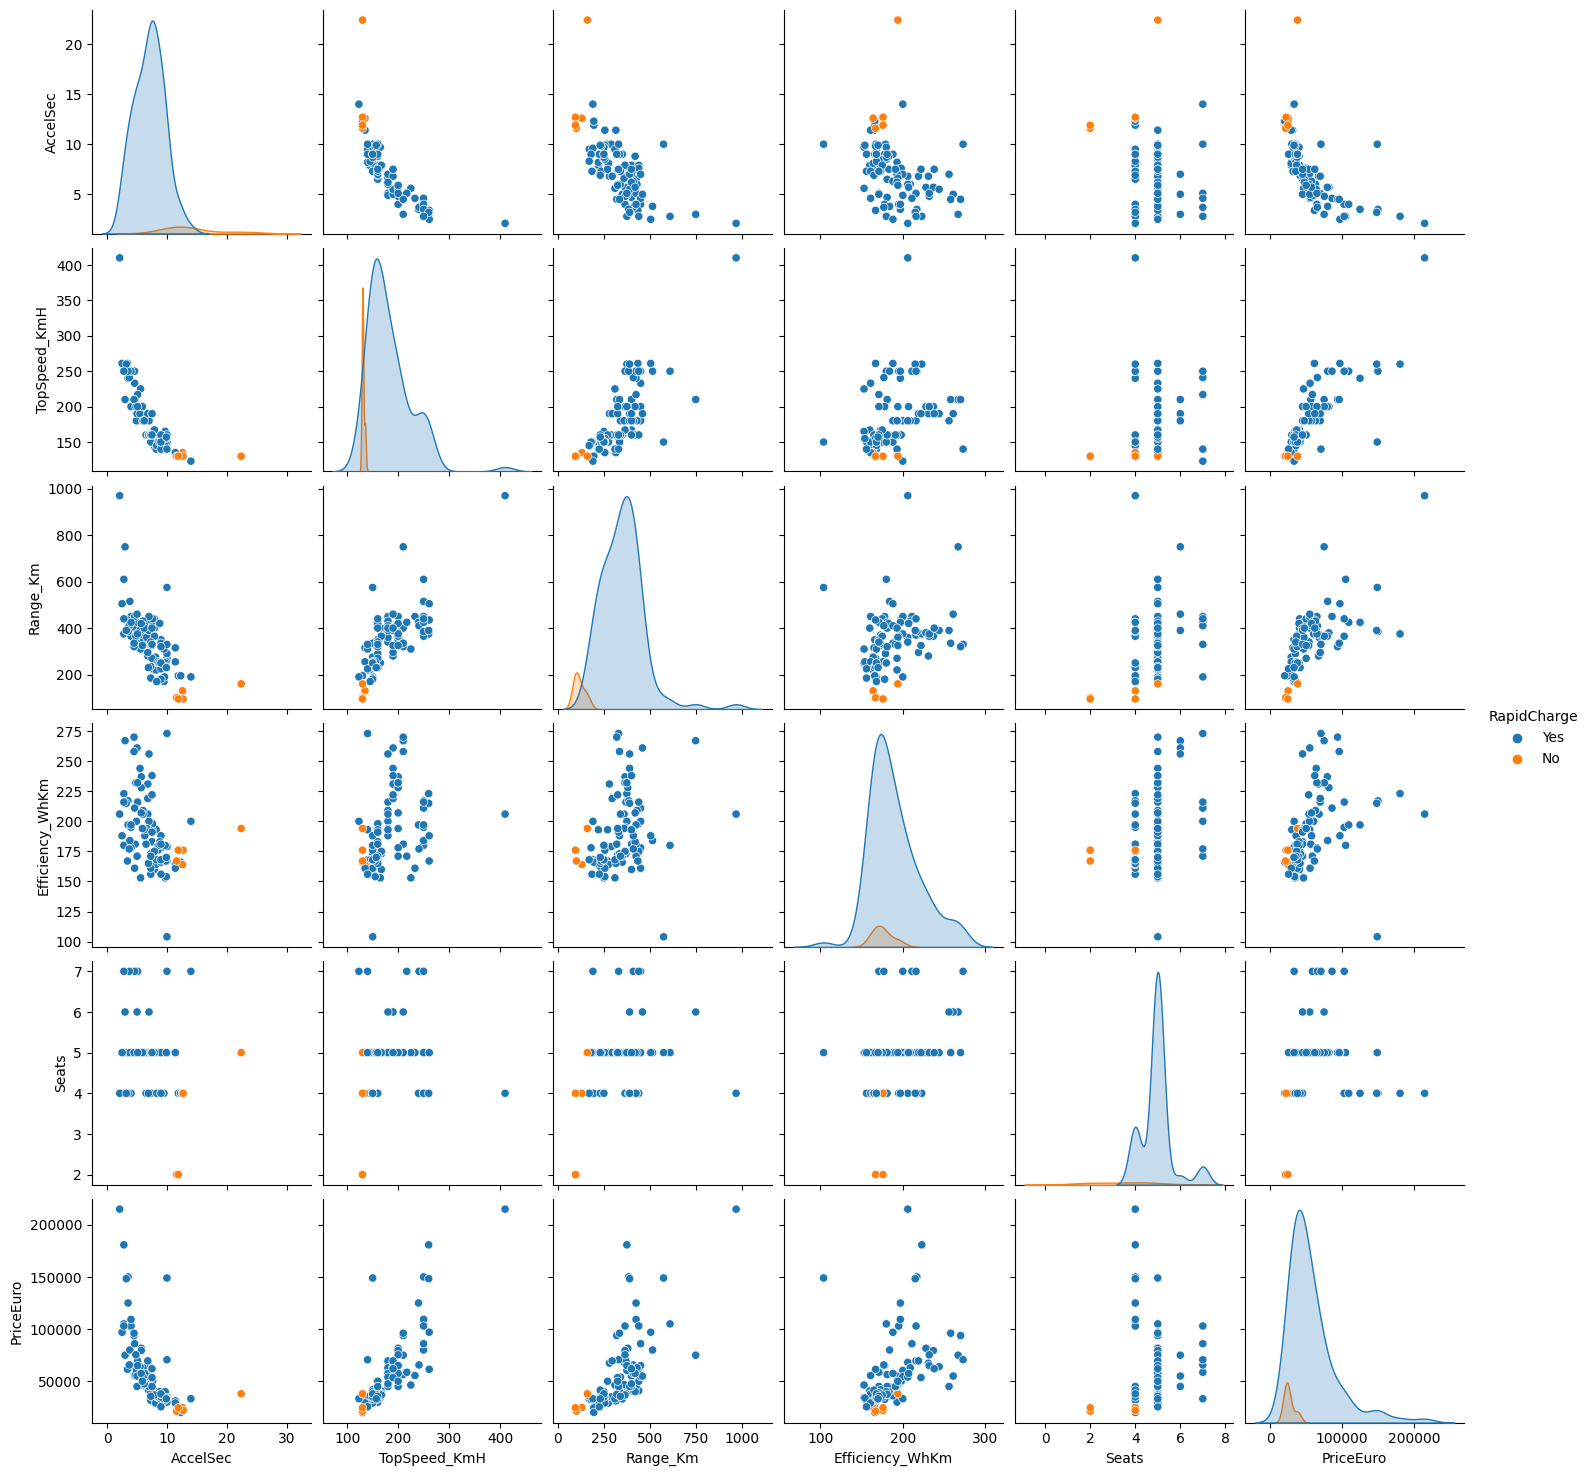

In [498]:
sns.pairplot(df,hue='RapidCharge')      #Pairplot of all the columns based on Rapid Charger presence

<ipython-input-499-9279af5eec59>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)


<Axes: >

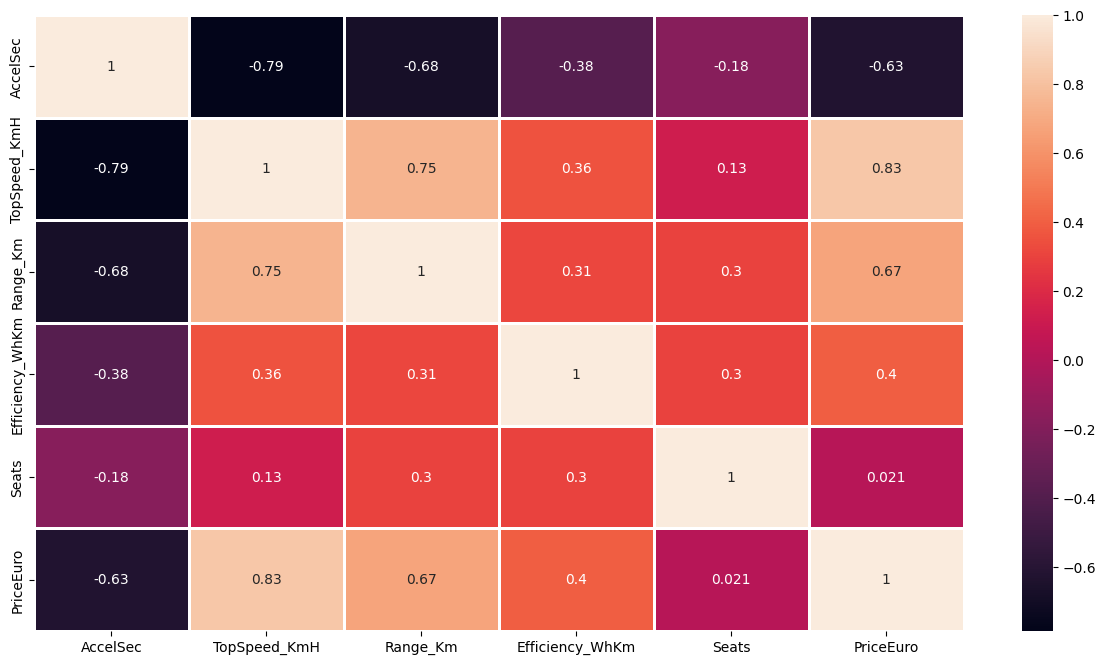

In [499]:
#Heatmap to show the correlation of the data

ax= plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

In [500]:
a=np.arange(1,104)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

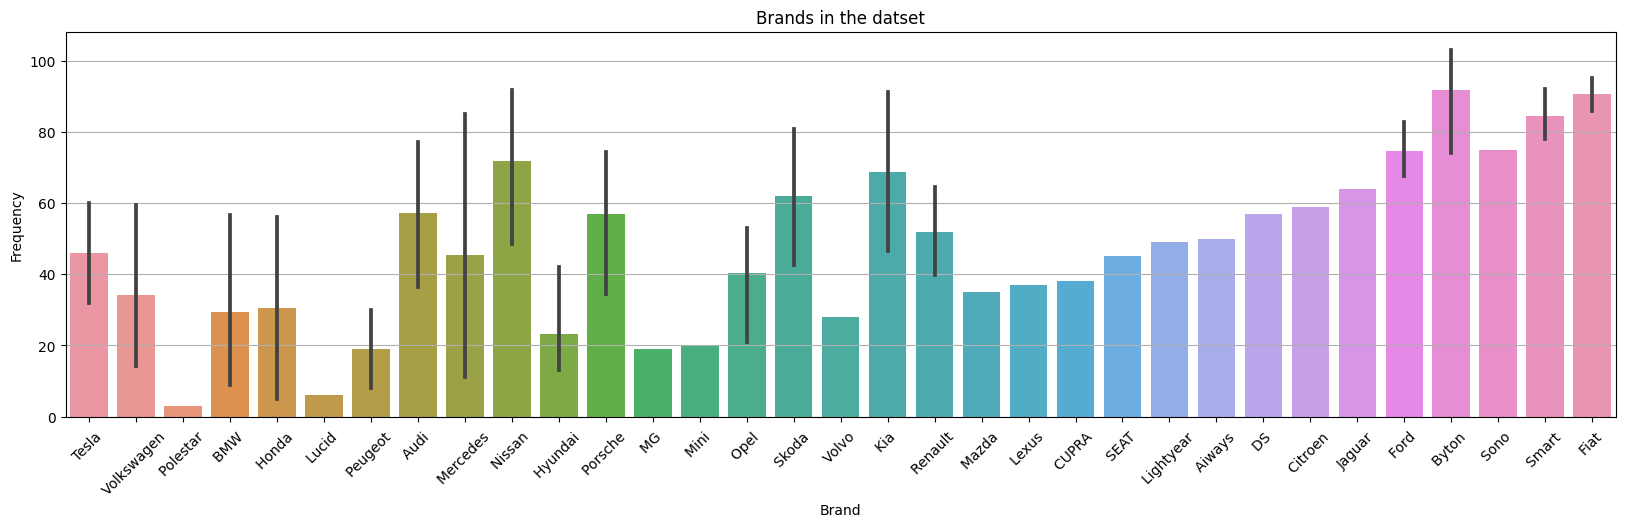

In [501]:
ax= plt.figure(figsize=(20,5))            #Frequency of the Brands in the dataset
sns.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

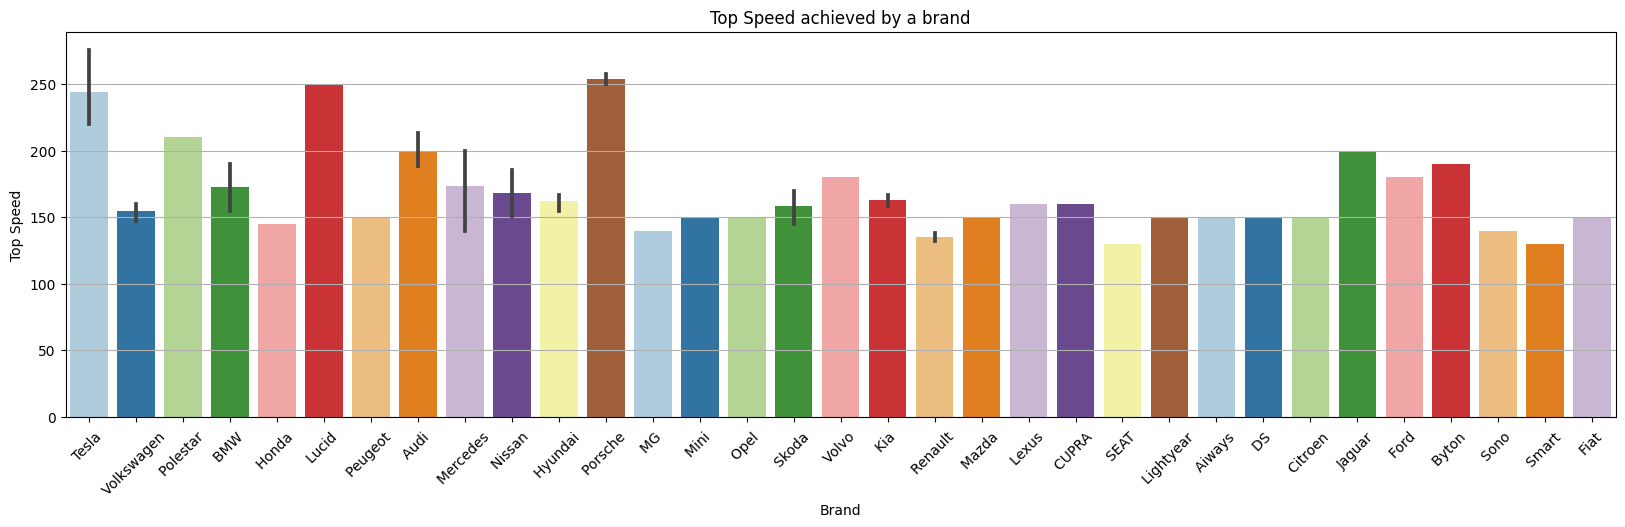

In [502]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')          #Top speeds achieved by the cars of a brand
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

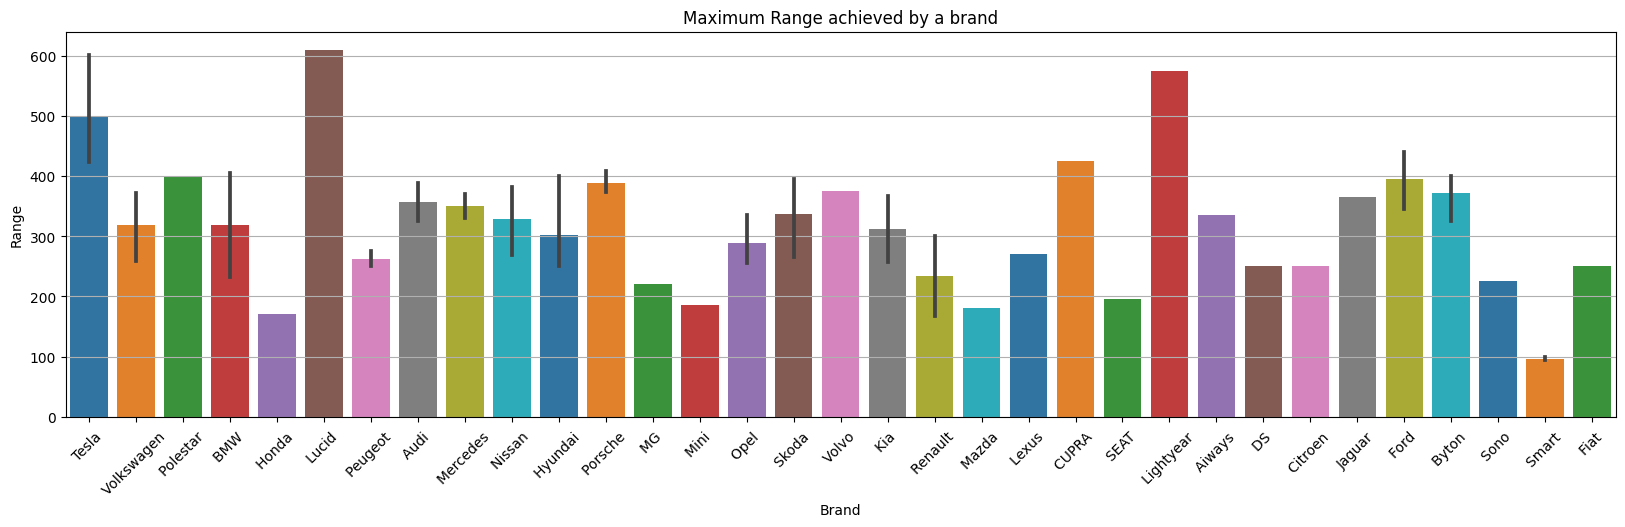

In [504]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')        #Range a car can achieve
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

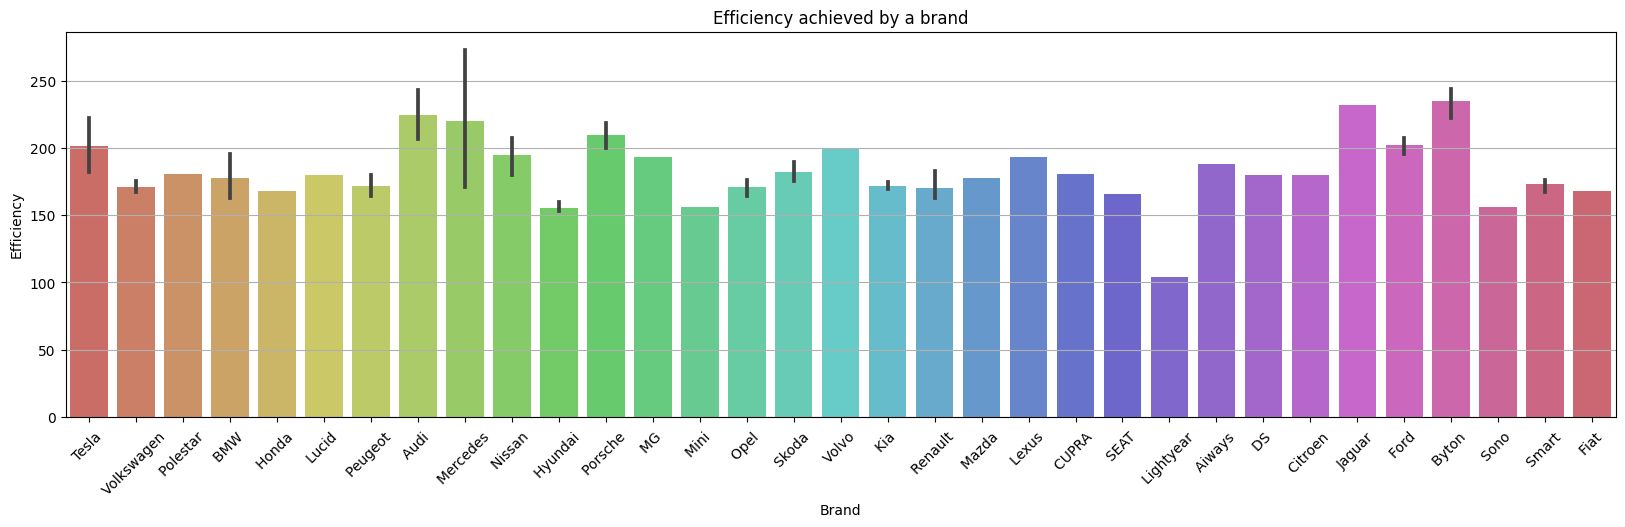

In [505]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')             #Car efficiency
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

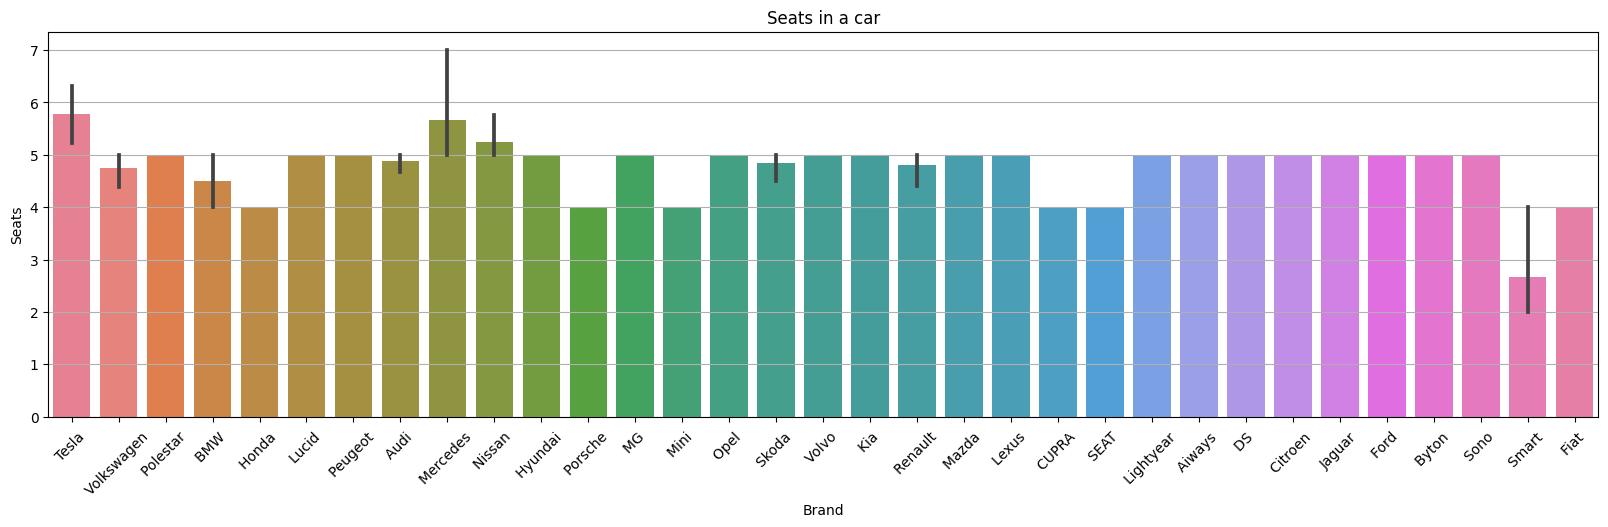

In [506]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')                       #Number of seats in each car
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

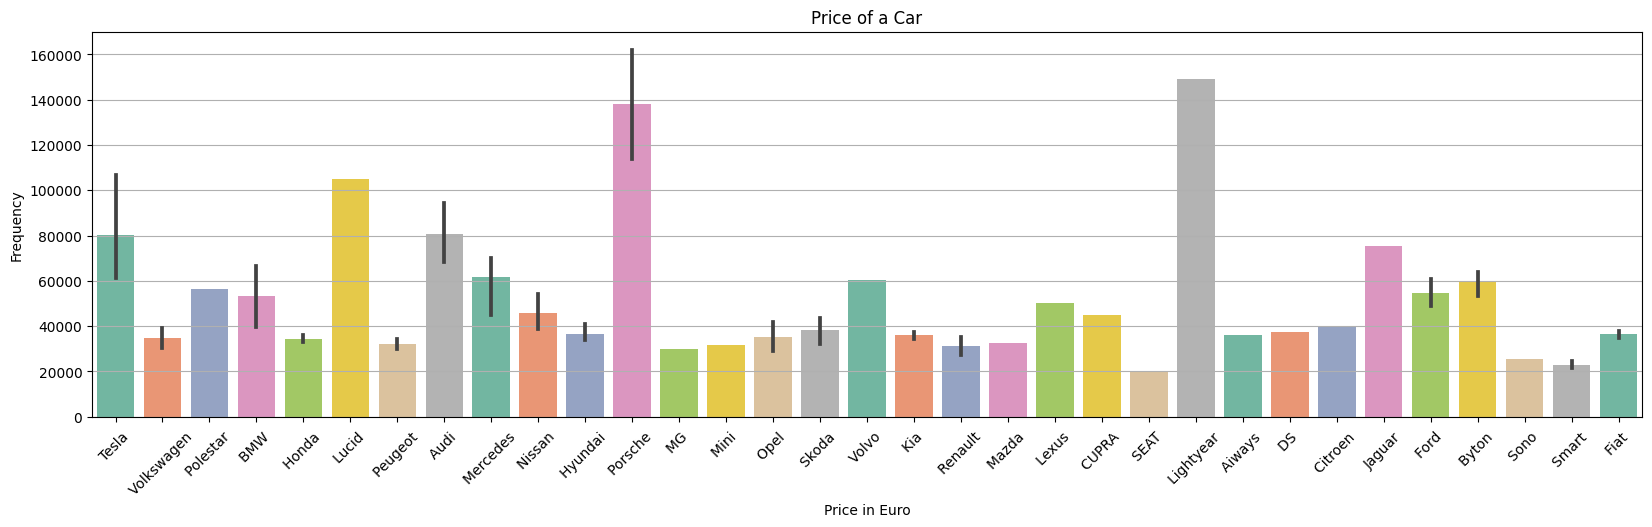

In [507]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='PriceEuro',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in Euro')                   #Price of cars (in Euro)
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Body Style')

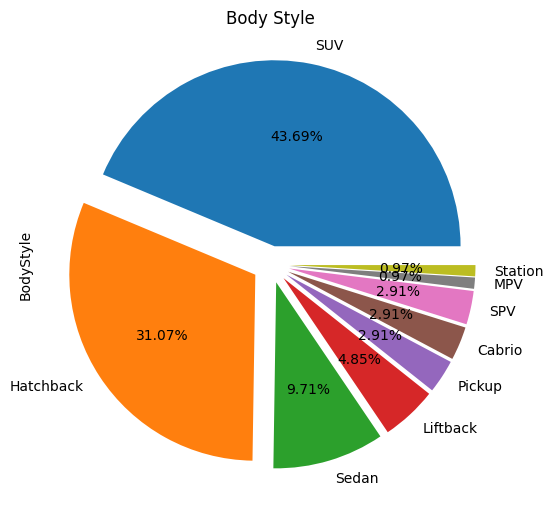

In [508]:
#Cars and their body style

df['BodyStyle'].value_counts().plot.pie(figsize=(6,10),autopct='%.2f%%',
                                        explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Text(0.5, 1.0, 'Segment')

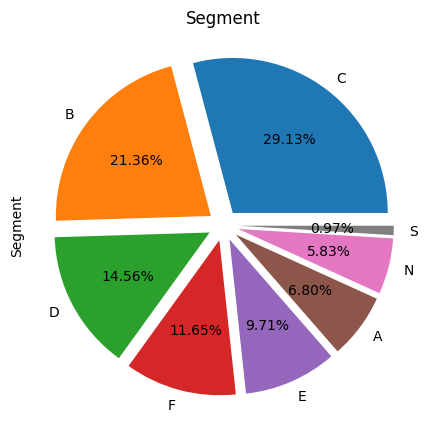

In [509]:
#Segment in which the cars fall under

df['Segment'].value_counts().plot.pie(figsize=(5,11),autopct='%.2f%%',
                                      explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Text(0.5, 1.0, 'Seats')

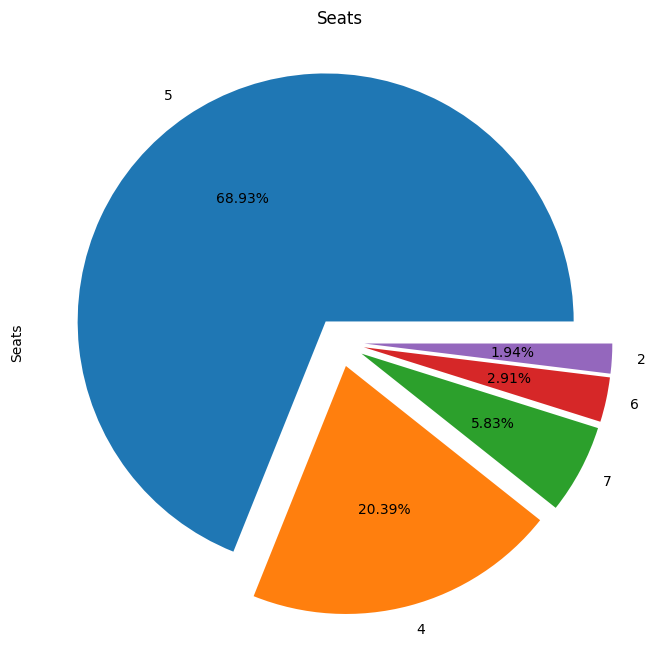

In [510]:
#Number of Seats

df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.2f%%',
                                    explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

# Data Preprocessing

In [511]:
df.dtypes                   #understanding the data types

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [512]:
df.isna().sum()               #check the sum of null values of columns

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [513]:
#Check the number of unique value from all object datatype
column=df.select_dtypes(include='object').nunique()
column

Brand              33
Model             102
FastCharge_KmH     51
RapidCharge         2
PowerTrain          3
PlugType            4
BodyStyle           9
Segment             8
dtype: int64

In [514]:
df.drop(["PlugType","Segment","FastCharge_KmH"],axis=1,inplace=True)    #dropping non required columns

In [515]:
df.head()                             #first 5 samples of the data

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,Yes,AWD,Sedan,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,Yes,RWD,Hatchback,5,30000
2,Polestar,2,4.7,210,400,181,Yes,AWD,Liftback,5,56440
3,BMW,iX3,6.8,180,360,206,Yes,RWD,SUV,5,68040
4,Honda,e,9.5,145,170,168,Yes,RWD,Hatchback,4,32997


# Checking Unique Values & Replacing it by integer values

---



In [516]:
df['RapidCharge'].unique()          #check unique values of RapidCharge

array(['Yes', 'No'], dtype=object)

In [517]:
#Putting Yes value as 1 and No value as 0 to make it into float from string
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [518]:
df['PowerTrain'].unique()         #check unique values of PowerTrain

array(['AWD', 'RWD', 'FWD'], dtype=object)

In [519]:
#Putting values as (0,1,2)
df['PowerTrain'].replace(to_replace=['AWD','RWD','FWD'],value=[0,1,2],inplace=True)

In [520]:
df['Brand'].unique()            #check unique values of Brands

array(['Tesla ', 'Volkswagen ', 'Polestar ', 'BMW ', 'Honda ', 'Lucid ',
       'Peugeot ', 'Audi ', 'Mercedes ', 'Nissan ', 'Hyundai ',
       'Porsche ', 'MG ', 'Mini ', 'Opel ', 'Skoda ', 'Volvo ', 'Kia ',
       'Renault ', 'Mazda ', 'Lexus ', 'CUPRA ', 'SEAT ', 'Lightyear ',
       'Aiways ', 'DS ', 'Citroen ', 'Jaguar ', 'Ford ', 'Byton ',
       'Sono ', 'Smart ', 'Fiat '], dtype=object)

In [521]:
df['BodyStyle'].unique()        #check unique values of BodyStyle

array(['Sedan', 'Hatchback', 'Liftback', 'SUV', 'Pickup', 'MPV', 'Cabrio',
       'SPV', 'Station'], dtype=object)

In [522]:
#Putting values to convert it from str to float datatype
df['BodyStyle'].replace(to_replace=['Sedan','Hatchback','Liftback', 'SUV', 'Pickup','MPV', 'Cabrio','SPV', 'Station'],
                        value=[0,1,2,3,4,5,6,7,8],inplace=True)

<ipython-input-523-38a79bd773d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),fmt='.1g',annot=True)


<Axes: >

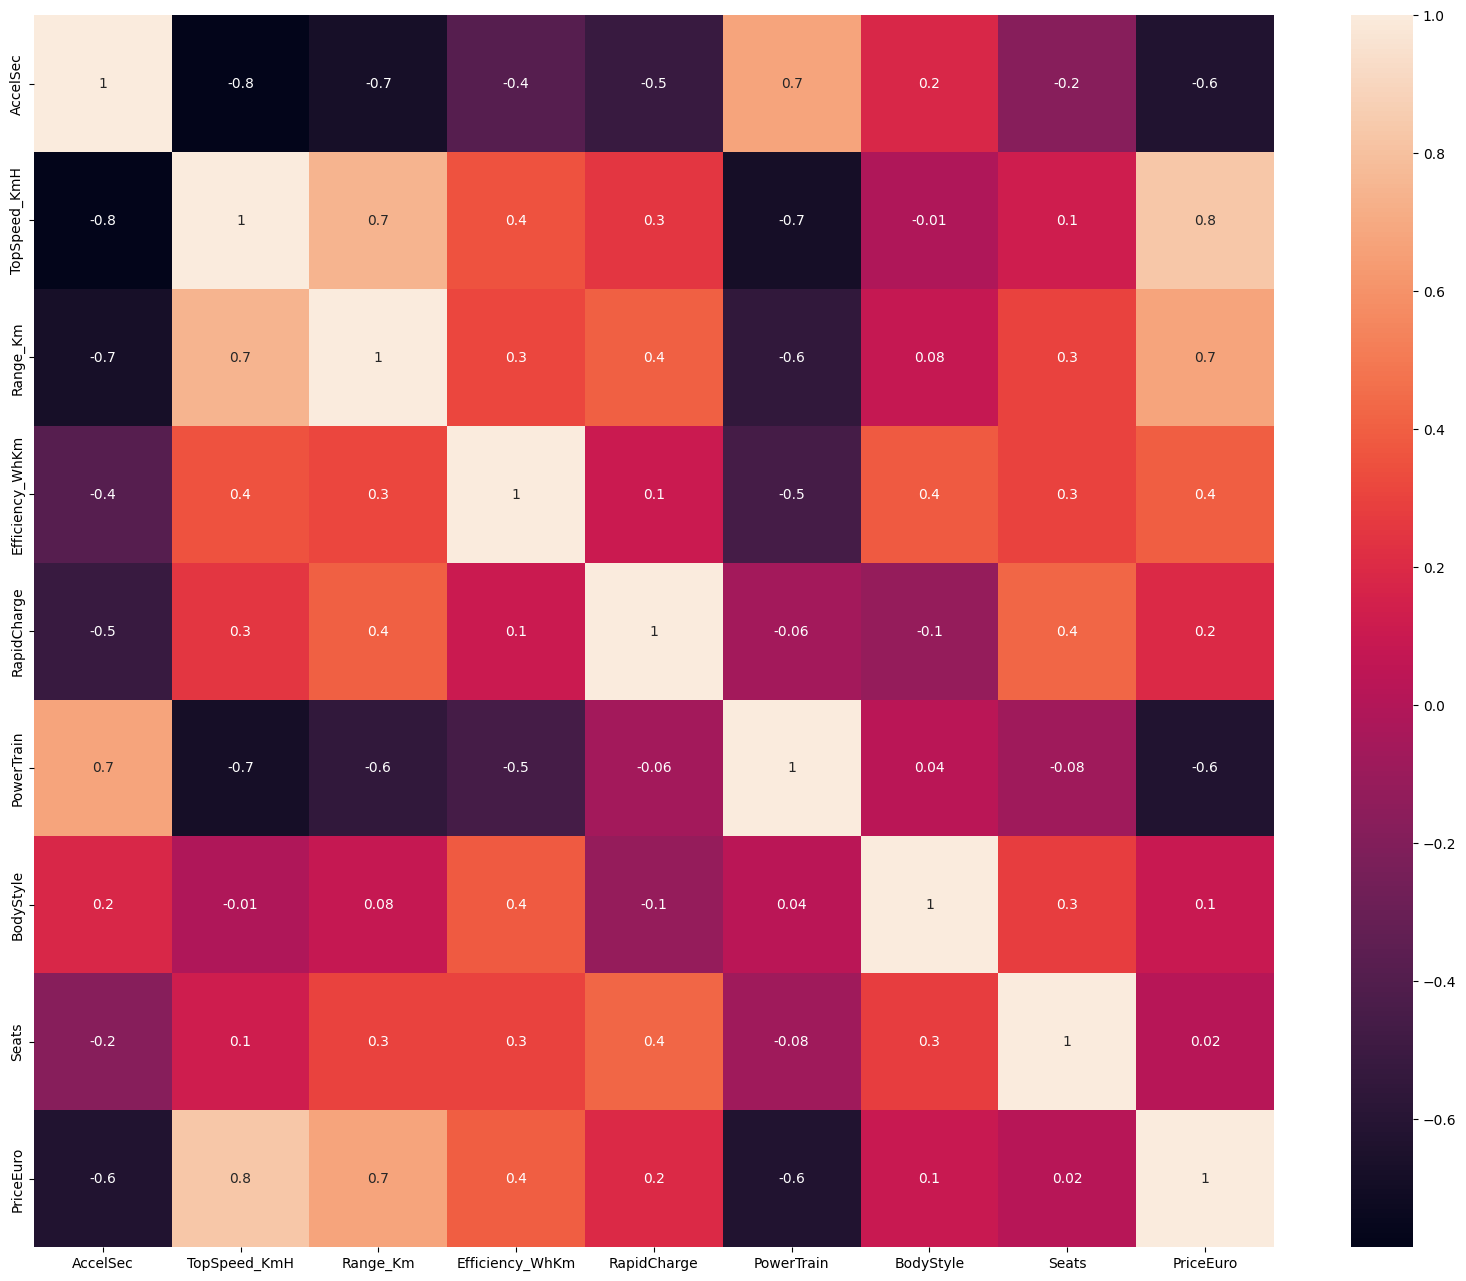

In [523]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),fmt='.1g',annot=True)

The heatmap visually represents the correlation between different numerical variables in the DataFrame. It uses a color scale to indicate the strength of the correlation, where warmer colors (e.g., red) represent positive correlations, cooler colors (e.g., blue) represent negative correlations, and shades closer to white represent weaker or no correlation.

# Training and Testing model

In [524]:
 # it will print a series of data types, with each column name and its corresponding data type
df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
RapidCharge          int64
PowerTrain           int64
BodyStyle            int64
Seats                int64
PriceEuro            int64
dtype: object

In [526]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,PowerTrain,BodyStyle,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,1,0,0,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,1,1,1,5,30000
2,Polestar,2,4.7,210,400,181,1,0,2,5,56440
3,BMW,iX3,6.8,180,360,206,1,1,3,5,68040
4,Honda,e,9.5,145,170,168,1,1,1,4,32997


In [525]:
from sklearn.model_selection import train_test_split # For splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression # For Linear Regression modeling
from sklearn.metrics import mean_squared_error # For calculating Mean Squared Error (MSE) for evaluation
from sklearn.metrics import r2_score # to evaluate the performance of a linear regression model

In [613]:
#Preparing data

x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm']]
y=df['PriceEuro']

In [614]:
# Spliting the data into training and testing sets
X_train,X_test,y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=365)

In [615]:
model = LinearRegression() # Initialize and train the Logistic Regression model


In [616]:
model.fit(X_train, y_train) # Fits the model

LinearRegression()

In [617]:
y_pred = model.predict(X_test) # Make predictions using the test data
y_pred

array([ 43139.92072163,  74464.69736037,  70531.21011211,  41905.88749427,
        61192.74644169,  57379.56242607,  66251.53161826,  77373.38229928,
        41211.20290956,  46424.01421923,  43836.15396178,  48136.2320803 ,
       103148.74718746, 102782.66103349,  59240.00904339,  50993.0876091 ,
        29085.11044943,  40771.73977392,  70066.96974335,  98792.24621853,
        31076.82568661,  70488.57733971,  97099.11127124,  52146.83664841,
       224913.13562628,  68575.49677279,  34764.75535444,  64015.79386543,
        45281.21244943,  72142.75957281,  50993.0876091 ])

In [618]:
r_squared = r2_score(y_test,y_pred)#R-squared value suggests that the model's predictions are worse
print("R-squared:",r_squared)

R-squared: 0.7835225979903608


In [619]:
mse = mean_squared_error(y_test, y_pred) # Evaluating the model's performance using Mean Squared Error (MSE)
print("Mean Squared Error:", mse)

Mean Squared Error: 360221614.42221093


In [620]:
coef = model.coef_[0] # the change in the target variable
print("Coefficient:", coef)

Coefficient: 1965.551264143504


In [621]:
intercept = model.intercept_ # the expected value of the target variable
print("Intercept:", intercept)

Intercept: -99261.32818863555


**Unknown Prediction**


In [623]:
print("AccelSec:(3.5 to 12)\nRange(150-500)\nTopSpeed_KmH(130 to 250)\nEfficiency_WhKm(140 to 250)")

AccelSec:(3.5 to 12)
Range(150-500)
TopSpeed_KmH(130 to 250)
Efficiency_WhKm(140 to 250)


In [624]:
input=np.array([[4.6,450,233,161]])
prediction = model.predict(input)
print('Predicted PriceEuro is:',prediction)

Predicted PriceEuro is: [88821.31969408]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Conclusion**

In this analysis using linear regression, we used the features 'AccelSec', 'Range_Km', 'TopSpeed_KmH', and 'Efficiency_WhKm' to predict the prices of electric cars ('PriceEuro'). By fitting a linear model to the data, we aimed to establish a relationship between these features and the car prices. Further analysis and model evaluation would be required to determine the r-squarred and effectiveness of the predictions.